# K-MEANS ALGORITHM

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# image = cv2.imread('/content/Lenna.png').astype(np.float32) / 255.
image = cv2.imread('/content/Polarlicht.jpg').astype(np.float32) / 255.
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [ ]:
data = image_lab.reshape((-1, 3))

In [ ]:
num_classes = 4
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.1)
_, labels, centers = cv2.kmeans(data, num_classes, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
segmented_lab = centers[labels.flatten()].reshape(image.shape)
segmented = cv2.cvtColor(segmented_lab, cv2.COLOR_Lab2RGB)

In [ ]:
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image[:, :, [2, 1, 0]])
plt.subplot(122)
plt.axis('off')
plt.title('segmented')
plt.imshow(segmented)
plt.show()

In [ ]:
# Helper function to display cv2 image object
def show_image(image, show_axis=False):
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if not show_axis:
    plt.axis('off')

In [ ]:
holi_img = cv2.imread('./images/holi.png').astype(np.float32) / 255.
holi_img_lab = cv2.cvtColor(holi_img, cv2.COLOR_BGR2Lab)
show_image(holi_img)

In [ ]:
num_classes = 10
data = holi_img_lab.reshape((-1, 3))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.1)
_, labels, centers = cv2.kmeans(data, num_classes, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
segmented_lab = centers[labels.flatten()].reshape(holi_img.shape)
segmented = cv2.cvtColor(segmented_lab, cv2.COLOR_Lab2RGB)

In [ ]:
plt.subplot(121)
plt.title('original')
show_image(holi_img)
plt.subplot(122)
plt.title('segmented')
plt.axis('off')
plt.imshow(segmented)

# COUNTERS

In [ ]:
#Library Import
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto
import random

In [ ]:
#Read the test image:
image = cv2.imread('/content/Lenna.png', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)

In [ ]:
# Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', ret)

In [ ]:
print('original image')
cv2_imshow(image)

print('Otsu threshold')
cv2_imshow(img_otsu_binary)

In [ ]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Prepare the external contour binary mask:

image_external = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image_external, contours, i, 255, -1)

In [ ]:
# Prepare the internal contour binary mask:

image_internal = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 255, -1)

In [ ]:
#Visualize the results:

plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('external')
plt.imshow(image_external, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('internal')
plt.imshow(image_internal, cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
print('original image')
cv2_imshow(image)

print('external')
cv2_imshow(image_external)

print('internal')
cv2_imshow(image_internal)

In [ ]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color, contours, -1, (0,255,0), 3)
print('contours')
cv2_imshow( color)


In [ ]:
hull = cv2.convexHull(contour)
cv2.drawContours(color, [hull], -1, (0,0,255), 3)

print('contours')
cv2_imshow(color)

In [ ]:
# Check the convexity of the contour and its hull:

print('Convex status of contour is %s' % cv2.isContourConvex(contour))
print('Convex status of its hull is %s' % cv2.isContourConvex(hull))

# **HAAR CASCADE**

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [ ]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('test.jpg')
#base_image = cv2.imread('photo.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

**FACE DETECTION**

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
#test_image = cv2.imread('photo.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5) # (img, scaleFactor, minNeighbors)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

**SMILE DETECTION**

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
#test_image = cv2.imread('photo.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
#test_image = cv2.imread('photo.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
test_image = cv2.imread('test.jpg')
#test_image = cv2.imread('photo.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
test_image = cv2.imread('test.jpg')
#test_image = cv2.imread('photo.jpg')
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
test_image = cv2.imread('test.jpg')
#test_image = cv2.imread('photo.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

**OBJECT RECOGNITION - VIDEO**

In [ ]:
import cv2
scale_factor = 1.2
min_neighbors = 3
min_size = (50, 50)
webcam=True #if working with video file then make it 'False'
def detect(path):
    cascade = cv2.CascadeClassifier(path)
    if webcam:
        video_cap = cv2.VideoCapture(1) # use 0,1,2..depanding on your webcam
    else:
        video_cap = cv2.VideoCapture("/content/video.mp4")
    while True:
        # Capture frame-by-frame
        ret, img = video_cap.read()
        #converting to gray image for faster video processing
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rects = cascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbors,
                                         minSize=min_size)
        # if at least 1 face detected
        if len(rects) >= 0:
            # Draw a rectangle around the faces
            for (x, y, w, h) in rects:
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # Display the resulting frame
            cv2.imshow('Face Detection on Video', img)
            #wait for 'c' to close the application
            if cv2.waitKey(1) & 0xFF == ord('c'):
                break
    video_cap.release()
def main():
    cascadeFilePath="haarcascade_frontalface_alt.xml"
    detect(cascadeFilePath)
    cv2.destroyAllWindows()
if __name__ == "__main__":
    main()

# **IMAGE READING**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
img = cv2.imread("Lenna.png")
print('data type is:',type(img))
print('image is stored in numpy  matrix:', img)
print('image shape is:', img.shape)
print('image dimension is:', img.ndim)

In [ ]:
#Display Image
print("Lena image")
cv2_imshow(img)

In [ ]:
pip install opencv-contrib-python

In [ ]:
img = cv2.imread("Lenna.png")

#Display Image
print("Lena image")
cv2_imshow(img)


#Saving Image on a file
isWritten = cv2.imwrite('Lenna-write.png', img)
if isWritten:
	print('\n \n Image is successfully saved as file.\n')


#Display Image
cv2.imread("Lenna-write.png")
print("Lena Written image")
#cv2_imshow(img_written)

**PIXEL INFORMATION**

In [ ]:
img = cv2.imread("Lenna.png")

print("Lena image")
cv2_imshow(img)

# Pixel Resolution and Depth
print("Pixel Resolution (Height, Width) and Depth:", img.shape)

print("Image Height:", img.shape[0])
print("Image Width:", img.shape[1])
print("Image layer/channel:", img.shape[-1])

**RGB - GREY**

In [ ]:
img = cv2.imread("Lenna.png")

print("Lena image")
cv2_imshow(img)

# Pixel Resolution and Depth
print("Pixel Resolution (Height, Width) and Depth:", img.shape)

print("Image Height:", img.shape[0])
print("Image Width:", img.shape[1])
print("Image layer/channel:", img.shape[-1])

**RGB - BW**

In [ ]:
# RGB to GreyScale 
img1 = cv2.imread("Lenna.png", 0)

print("Lena GreyScale  image")
cv2_imshow(img1)

# GreyScale to BW
print("Lena BW image")

ret, im_bw = cv2.threshold(img1, 127,255,cv2.THRESH_BINARY)
#im_bw = cv2.threshold(img1, 127,255,cv2.THRESH_BINARY)[1]
#(thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2_imshow(im_bw)

**COLOR FILTER**

In [ ]:
img = cv2.imread("/content/Lenna.png")

print("RGB original image")
cv2_imshow(img)

print("HSV image")
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img_HSV)

print("HUE CHANNEL")
cv2_imshow(img_HSV[:, :, 0] ) #HUE CHANNEL
print("SATURATION")
cv2_imshow(img_HSV[:, :, 1] ) #SATURATION
print("VALUE")
cv2_imshow(img_HSV[:, :, 2] )  #VALUE

**EXTRACTING RGB LAYERS**

In [ ]:
import numpy as np

img = cv2.imread("/content/Lenna.png")

print("RGB original image")
cv2_imshow(img)

B, G, R = cv2.split(img)

#defining a 2-D arrays of zeros for masking R G B channels
zeros = np.zeros(img.shape[:2], dtype="uint8")

#Extracting R channel
print("Red component/attribute in image")
cv2_imshow(cv2.merge([zeros,zeros,R]))

#Extracting G channel
print("Green component/attribute in image")
cv2_imshow(cv2.merge([zeros,G,zeros]))

#Extracting B channel
print("Blue component/attribute in image")
cv2_imshow(cv2.merge([B,zeros,zeros]))

**IMAGE DISPLACEMENT OR TRANSLATION**

In [ ]:
import numpy as np

img = cv2.imread("/content/Lenna.png")

print("RGB original image")
cv2_imshow(img)

B, G, R = cv2.split(img)

#defining a 2-D arrays of zeros for masking R G B channels
zeros = np.zeros(img.shape[:2], dtype="uint8")

#Extracting R channel
print("Red component/attribute in image")
cv2_imshow(cv2.merge([zeros,zeros,R]))

#Extracting G channel
print("Green component/attribute in image")
cv2_imshow(cv2.merge([zeros,G,zeros]))

#Extracting B channel
print("Blue component/attribute in image")
cv2_imshow(cv2.merge([B,zeros,zeros]))

**IMAGE ROTATION**

In [ ]:
img = cv2.imread("/content/Lenna.png")

#Storing Height and Width of the image
height, width = img.shape[:2]
print("Image height is: ", height)
print("Image width is: ", width)

#Rotate Image
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 70, .5)
#vary (height, width), degree, and scaling factor

#warpAffine function shifts the image
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

print("Original image")
cv2_imshow(img)

print("Rotated image")
cv2_imshow(rotated_image)

**IMAGE TRANSPOSE**

In [ ]:
img = cv2.imread("/content/Lenna.png")

#Transpose image
tras_image = cv2.transpose(img)

print("Original image")
cv2_imshow(img)

print("Transposed image")
cv2_imshow(tras_image)

**IMAGE SCALING AND RESIZING**

In [ ]:
img = cv2.imread("/content/Lenna.png")

print("Original image")
cv2_imshow(img)

#1 - resizing image to 3/4 of original size
img_scaled = cv2.resize(img, None, fx = 0.75, fy = 0.75)
print("Scaled to 3/4 image")
cv2_imshow(img_scaled)

#2 - resizing image to double of original size
img_double = cv2.resize(img, None, fx = 2, fy = 2)
#img_double = cv2.resize(img, None, fx = 2, fy = 2, interpolation=cv2.INTER_CUBIC)
print("Scaled to double the original image")
cv2_imshow(img_double)

#3 - Image resizing to required dimention
img_req_resize = cv2.resize(img, (900, 400), interpolation=cv2.INTER_AREA)
print("Image resizing to required dimention")
cv2_imshow(img_req_resize)

**IMAGE RESIZE - PYTHON PYRAMID**

In [ ]:
img = cv2.imread("/content/Lenna.png")

img_small = cv2.pyrDown(img)
img_large = cv2.pyrUp(img)

print("Smaller image")
cv2_imshow(img_small)

print("Original image")
cv2_imshow(img)

print("Larger image")
cv2_imshow(img_large)

**IMAGE CROPPING**

In [ ]:
img = cv2.imread("/content/Lenna.png")

#Storing Height and Width of the image for cropping
height, width = img.shape[:2]
print("Image height is: ", height)
print("Image width is: ", width)

#get the starting pixel coordinates(top left, of cropping rectangle)
start_row, start_col = int(height*.25), int(width*.25)

#get the ending pixel coordinates (bottom right)
end_row, end_col = int(height*.75), int(width*.75)

#corp the image
cropped_img = img[start_row:end_row, start_col:end_col]

print("Original image")
cv2_imshow(img)

print("Cropped image")
cv2_imshow(cropped_img)

**IMAGE ARITHMETICS**

In [ ]:
img = cv2.imread("/content/Lenna.png")

print("Original image")
cv2_imshow(img)

#We create a matrix to perform image airthmeics (matirx having value of 150)
M = np.ones(img.shape, dtype="uint8") * 150
#M = np.zeros(img.shape, dtype="uint8") + 150

#Addition
add_img = cv2.add(img, M)
print("Image after addition Operation")
cv2_imshow(add_img)

#Subtraction
sub_img = cv2.subtract(img, M)
print("Image after Subtraction Operation")
cv2_imshow(sub_img)

#Multipication
mul_img = cv2.multiply(img, M)
print("Image after Multipication Operation")
cv2_imshow(mul_img)

#We create a matrix to perform image airthmeics (matirx having value of 150)
M = np.zeros(img.shape, dtype="uint8") + 150

**BITWISE OPERATION BW IMAGES**

In [ ]:
img = cv2.imread("/content/Lenna.png")

#image-1 - Square
square_img = np.zeros((300, 300), np.uint8)
cv2.rectangle(square_img, (50,50),(250,250), 255, -1) #img_name, start point, end_point, pixel_value, line_cover put= 1,2,3 and see(we fill completely)
print("Square Image")
cv2_imshow(square_img)

#image-2 - half ellipse
ellipse_img = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse_img, (150,150),(150,150), 30, 0, 180, 255, -1)
print("Ellipse Image")
cv2_imshow(ellipse_img)

#bitwise AND Operation
AND_img = cv2.bitwise_and(square_img, ellipse_img)
print("Image - AND")
cv2_imshow(AND_img)

#bitwise AND Operation
OR_img = cv2.bitwise_or(square_img, ellipse_img)
print("Image - OR")
cv2_imshow(OR_img)

#bitwise XOR Operation
XOR_img = cv2.bitwise_xor(square_img, ellipse_img)
print("Image - XOR")
cv2_imshow(XOR_img)

#bitwise NOT Operation
SNOT_img = cv2.bitwise_not(square_img)
print("Square Image - NOT")
cv2_imshow(SNOT_img)

#bitwise NOT Operation
ENOT_img = cv2.bitwise_not(ellipse_img)
print("Ellipse Image - NOT")
cv2_imshow(ENOT_img)

**BLURRING**

In [ ]:
img = cv2.imread("/content/Lenna.png")

print("Original image")
cv2_imshow(img)

#Creating a 3x3 Kernal Matrix (its a filter matrix to create blurring in lenna image)
kernal_3x3 = np.ones((3, 3), np.float32)/9
kernal_7x7 = np.ones((7, 7), np.float32)/49

# Creating Blurring effect
blur_img_3x3 = cv2.filter2D(img, -1, kernal_3x3) # -1 = image depth
print("Blurred image 3x3")
cv2_imshow(blur_img_3x3)

blur_img_7x7 = cv2.filter2D(img, -1, kernal_7x7) # -1 = image depth
print("Blurred image 7x7")
cv2_imshow(blur_img_7x7)


**SMOOTHING**

In [ ]:
img = cv2.imread("/content/Lenna.png")

print("Original image")
cv2_imshow(img)

#Averaging
blur_img = cv2.blur(img, (3, 3)) #3x3 is kernal matrix
print("Averaging Blur image")
cv2_imshow(blur_img)

#Gaussian Blur filter
gaussian_img = cv2.GaussianBlur(img, (7,7), 0) #it is light weight, blurring + smoothing effect
print("Gaussian Blur image")
cv2_imshow(gaussian_img)

#Median Blur filter - heavy filter
median_img = cv2.medianBlur(img, 5) # applied on all pixel by cal meian values
print("Median Blur image")
cv2_imshow(median_img)

#Bilatral Filter - Heavy Filter - best
bilatral_img = cv2.bilateralFilter(img, 9, 75, 75) # applied on all pixel by cal meian values
print("Bilatral Blur image")
cv2_imshow(bilatral_img)

**EDGE DETECTION**

In [ ]:
img = cv2.imread("/content/Lenna.png", 0)


#Storing Height and Width of the image for cropping
height, width = img.shape[:2]
print("Image height is: ", height)
print("Image width is: ", width)
print("Original image")
cv2_imshow(img)

#extract Slop Edges -
#1 - we use sobel - poor method - too noisy
sobel_x_img = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5) #img, data, height, width, kernal
sobel_y_img = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)
print("Sobel X image")
cv2_imshow(sobel_x_img)
print("Sobel Y image")
cv2_imshow(sobel_y_img)

#Bitwise ORing of both images
sobel_OR_img = cv2.bitwise_or(sobel_x_img, sobel_y_img)
print("Sobel OR image")
cv2_imshow(sobel_OR_img)

#2 - we use laplacian
laplacian_img = cv2.Laplacian(img,cv2.CV_64F)
print("laplacian image")
cv2_imshow(laplacian_img )

#3 - Canny Edge Detection
canny_img = cv2.Canny(img, 29, 170)
print("Canny image")
cv2_imshow(canny_img )

# **LANE DETECTION**

In [ ]:
!git clone https://github.com/Dt-Pham/Advanced-Lane-Lines.git
%cd Advanced-Lane-Lines/

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import cv2
from docopt import docopt
from IPython.display import HTML
from IPython.core.display import Video
from moviepy.editor import VideoFileClip
from CameraCalibration import CameraCalibration
from Thresholding import *
from PerspectiveTransformation import *
from LaneLines import *

class FindLaneLines:
    def __init__(self):
        """ Init Application"""
        self.calibration = CameraCalibration('camera_cal', 9, 6)
        self.thresholding = Thresholding()
        self.transform = PerspectiveTransformation()
        self.lanelines = LaneLines()

    def forward(self, img):
        out_img = np.copy(img)
        img = self.calibration.undistort(img)
        img = self.transform.forward(img)
        img = self.thresholding.forward(img)
        img = self.lanelines.forward(img)
        img = self.transform.backward(img)

        out_img = cv2.addWeighted(out_img, 1, img, 0.6, 0)
        out_img = self.lanelines.plot(out_img)
        return out_img

    def process_image(self, input_path, output_path):
        img = mpimg.imread(input_path)
        out_img = self.forward(img)
        mpimg.imsave(output_path, out_img)

    def process_video(self, input_path, output_path):
        clip = VideoFileClip(input_path)
        out_clip = clip.fl_image(self.forward)
        out_clip.write_videofile(output_path, audio=False)

def main():
    findLaneLines = FindLaneLines()
    findLaneLines.process_video("challenge_video.mp4","output.mp4")

if __name__ == "__main__":
    main()

# **IMAGE COLORS MODELS**

**RGB MODELS**

In [ ]:
import cv2
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt # Will use matplotlib for showing the image
%matplotlib inline 

image = cv2.imread('download.jpeg')

image = cv2.resize(image, (300, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

B = image[:,:,0:1]

G = image[:,:,1:2]

R = image[:,:,2:3]

plt.axis("off")
plt.title('R Component')
plt.imshow(R)
plt.show()
plt.axis("off")
plt.title('G Component')
plt.imshow(G)
plt.show()
plt.axis("off")
plt.title('B Component')
plt.imshow(B)
plt.show()

**CMY MODEL**

In [ ]:
C = 255 - R
M = 255 - G
Y = 255 - B

In [ ]:
plt.axis("off")
plt.title('C Component')
plt.imshow(C)
plt.show()
plt.axis("off")
plt.title('M Component')
plt.imshow(M)
plt.show()
plt.axis("off")
plt.title('Y Component')
plt.imshow(Y)
plt.show()

**YIQ MODEL**

In [ ]:
Y = 0.299*R + 0.587*G + 0.114*B
I = 0.596*R - 0.275*G - 0.321*B
Q = 0.212*R - 0.523*G + 0.311*B 

In [ ]:
plt.axis("off")
plt.title('Y Component')
plt.imshow(Y)
plt.show()
plt.axis("off")
plt.title('I Component')
plt.imshow(I)
plt.show()
plt.axis("off")
plt.title('Q Component')
plt.imshow(Q)
plt.show()

**YUQ MODEL**

In [ ]:
Y = 0.299 * R + 0.587 * G + 0.114 * B
U = 0.493 * (B - Y )
V = 0.877 * (R - Y )

In [ ]:
plt.axis("off")
plt.title('Y Component')
plt.imshow(Y)
plt.show()
plt.axis("off")
plt.title('U Component')
plt.imshow(U)
plt.show()
plt.axis("off")
plt.title('V Component')
plt.imshow(V)
plt.show()

**HIS/HSI MODEL**

In [ ]:
def RGB_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue
       
        return calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)

In [ ]:
img = cv2.imread('download.jpeg', 1)
H, S, I = RGB_TO_HSI(img)

In [ ]:
plt.axis("off")
plt.title('H Component')
plt.imshow(H)
plt.show()
plt.axis("off")
plt.title('S Component')
plt.imshow(S)
plt.show()
plt.axis("off")
plt.title('I Component')
plt.imshow(I)
plt.show()

**HCV MODEL**

In [ ]:
plt.axis("off")
plt.title('H Component')
plt.imshow(H)
plt.show()
plt.axis("off")
plt.title('C Component')
plt.imshow(C)
plt.show()
plt.axis("off")
plt.title('V Component')
plt.imshow(V)
plt.show()

**HSV MODEL**

In [ ]:
plt.axis("off")
plt.title('H Component')
plt.imshow(H)
plt.show()
plt.axis("off")
plt.title('S Component')
plt.imshow(S)
plt.show()
plt.axis("off")
plt.title('V Component')
plt.imshow(V)
plt.show()

# **COUNTERS**

In [ ]:
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('bubblingFish.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

edged = cv2.Canny(gray, 30, 200) 

contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Canny Edges After Contouring")
cv2_imshow(edged)
cv2.imwrite('CannyFish.jpg', edged)  

print("Number of Contours: " + str(len(contours))) 

In [ ]:
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

print("Contours")
cv2_imshow(image)
cv2.imwrite('Contours.jpg', image)

In [ ]:
image2 = cv2.imread('bubblingFish.jpg')
if len(contours) != 0:
	c = max(contours, key = cv2.contourArea)
cv2.drawContours(image2, c, -1, (0, 255, 0), 3)

print("Largest Contour")
cv2_imshow(image2)
cv2.imwrite('LargestContour.jpg', image2) 

# **OTSU MODEL**

In [ ]:
#Library Import
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto
import random

In [ ]:
#Read the test image:
image = cv2.imread('/content/Lenna.png', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)

In [ ]:
# Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', ret)

In [ ]:
print('original image')
cv2_imshow(image)

print('Otsu threshold')
cv2_imshow(img_otsu_binary)

In [ ]:
# Load the test binary image:
image = cv2.imread('/content/BnW.png', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)

In [ ]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Prepare the external contour binary mask:

image_external = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image_external, contours, i, 255, -1)

In [ ]:
# Prepare the internal contour binary mask:

image_internal = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 255, -1)

In [ ]:
#Visualize the results:

plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('external')
plt.imshow(image_external, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('internal')
plt.imshow(image_internal, cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
print('original image')
cv2_imshow(image)

print('external')
cv2_imshow(image_external)

print('internal')
cv2_imshow(image_internal)

# **CONVEX HULL**

In [ ]:
# Find the convex hull for the contour, draw it on the image, and display it:

hull = cv2.convexHull(contour)
cv2.drawContours(color, [hull], -1, (0,0,255), 3)

print('contours')
cv2_imshow(color)

In [ ]:
# Check the convexity of the contour and its hull:

print('Convex status of contour is %s' % cv2.isContourConvex(contour))
print('Convex status of its hull is %s' % cv2.isContourConvex(hull))

In [ ]:
import cv2
# Load the image
img1 = cv2.imread('/content/cars.jpg', cv2.IMREAD_GRAYSCALE)
# Convert it to greyscale
#img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# Threshold the image
ret, thresh = cv2.threshold(img1,50,255,0)
# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# For each contour, find the convex hull and draw it
# on the original image.
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)
# Display the final convex hull image
cv2_imshow(img1)


# **MERGE 2 IMAGES**

In [ ]:
# Load the image
img = cv2.imread('/content/pineapple.jpg', 0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Shape:', img.shape)
print('Data type:', img.dtype)
print('RGB Color Space')
cv2_imshow(img)

In [ ]:
# Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', ret)

In [ ]:
print('original image')
cv2_imshow(img)

print('Otsu threshold')
cv2_imshow(img_otsu_binary)

In [ ]:
_, thresh = cv2.threshold(img_otsu_binary, 184, 255,cv2.THRESH_BINARY_INV)

In [ ]:
print('THRESH_BINARY_INV')
cv2_imshow(thresh)

In [ ]:
# Find the contour of the figure 
contours, hierarchy = cv2.findContours(
                                   image = thresh, 
                                   mode = cv2.RETR_TREE, 
                                   method = cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)

In [ ]:
#plt.imshow(img_copy)
print('Image with contour')
cv2_imshow(img_copy)

# **COIN EDGE DETECTION - OTSU**

In [ ]:
#Read the test image:
image = cv2.imread('/content/watershed_coins_01_contour.jpg', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)

In [ ]:
# Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', ret)



print('original image')
cv2_imshow(image)

print('Otsu threshold')
cv2_imshow(img_otsu_binary)

In [ ]:
# Find the contours of the loaded image, draw them, and show the result:

contours, hierarchy = cv2.findContours(img_otsu_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# loop over the contours
for (i, c) in enumerate(contours):
	# draw the contour
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(img_otsu_binary, "#{}".format(i + 1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(img_otsu_binary, [c], -1, (0, 255, 0), 2)


print('Number of Coins using - Thresholding and Contour Detections ')
cv2_imshow(img_otsu_binary)

# **MORPHOLOGICAL TRANSFORMATIONS**

**EROSION**

In [ ]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
#dilation = cv2.dilate(img,kernel,iterations = 1)
erosion = cv2.erode(img, kernel, iterations=1)

print('Eroded image')
cv2_imshow(erosion)

**DIALATION**

In [ ]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

print('Dilated image')
cv2_imshow(dilation)

# **WATERSHED ALGORITHM**

In [ ]:
#import the necessary libraries
import cv2
import numpy as np
import skimage
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# creating a simple binary image of two partially overlapping circles
img = np.zeros((256, 256),dtype="uint8")
cv2.circle(img, (70,70), 50, (255,255,255), (-1))
cv2.circle(img, (140,140), 70, (255,255,255), (-1))
cv2_imshow(img)

In [ ]:
dist_transform = cv2.distanceTransform(img, cv2.DIST_L2,3)
cv2_imshow(dist_transform)

In [ ]:
local_max_location = peak_local_max(dist_transform, min_distance=1, indices=True)
local_max_boolean = peak_local_max(dist_transform, min_distance=1, indices=False)

print(local_max_boolean)

In [ ]:
img1 = np.zeros((7, 7))
img1[2, 2] = 4
img1[2, 4] = 7
print(img1)

In [ ]:
peak_local_max(img1, min_distance=1)

In [ ]:
peak_local_max(img1, min_distance=2)

In [ ]:
markers, _ = ndi.label(local_max_boolean)

In [ ]:
segmented = skimage.segmentation.watershed(255-dist_transform, markers, mask=img)

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Input image')
ax[1].imshow(-dist_transform, cmap=plt.cm.gray)
ax[1].set_title('Distance transform')
ax[2].imshow(segmented, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# **LOGO EXTRACTION**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [7]:
#Colour Image
img = cv2.imread("MAHE.png")
print("MAHE Colour image")
#cv2_imshow(img)
    
# It converts the BGR color space of image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Threshold of blue in HSV space
lower_orange = np.array([1, 90, 90])
#lower_blue = np.array([125, 0, 0])
upper_orange = np.array([18, 255, 255])
#upper_blue = np.array([255, 0, 0])
 
# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_orange, upper_orange)
#mask = cv2.inRange(img, lower_orange, upper_orange)
     
# The black region in the mask has the value of 0, so when multiplied with original image removes all non-blue regions
result = cv2.bitwise_and(img, img, mask = mask)
cv2_imshow(img)
print("MAHE Orange Mask image")
cv2_imshow(mask)
print("MAHE Final image")
cv2_imshow(result)

MAHE Colour image


error: ignored

In [ ]:
#Colour Image
img = cv2.imread("MAHE.png")
print("MAHE Colour image")
#cv2_imshow(img)
    
# It converts the BGR color space of image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Threshold of blue in HSV space
lower_orange = np.array([0, 0, 0])
#lower_blue = np.array([125, 0, 0])
upper_orange = np.array([0,0,0])
#upper_blue = np.array([255, 0, 0])
 
# preparing the mask to overlay
#mask = cv2.inRange(hsv, lower_orange, upper_orange)
mask = cv2.inRange(img, lower_orange, upper_orange)
     
# The black region in the mask has the value of 0, so when multiplied with original image removes all non-blue regions
cv2_imshow(img)
cv2_imshow(mask)
print("MAHE Final image")
mask= 255-mask
cv2_imshow(mask)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
#Colour Image
img = cv2.imread("/content/MAHE.png")
print("Lena Colour image")
#cv2_imshow(img)
    
# It converts the BGR color space of image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Threshold of blue in HSV space
lower_blue = np.array([5, 0, 0])
#lower_blue = np.array([, 0, 0])
upper_blue = np.array([30, 255, 255])
#upper_blue = np.array([, 0, 0])
 
# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_blue, upper_blue)
#mask = cv2.inRange(img, lower_blue, upper_blue)
     
# The black region in the mask has the value of 0, so when multiplied with original image removes all non-blue regions
result = cv2.bitwise_and(img, img, mask = mask)
print("Manipal Logo with Text")
cv2_imshow(img)
print("Mask for manipal logo")
cv2_imshow(mask)
print("Manipal Logo")
cv2_imshow(result)

In [ ]:
#Colour Image
img = cv2.imread("MAHE.png")
print("MAHE Colour image")
#cv2_imshow(img)
    
# It converts the BGR color space of image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Threshold of blue in HSV space
lower_orange = np.array([1, 180, 200])
#lower_blue = np.array([125, 0, 0])
upper_orange = np.array([18, 255, 255])
#upper_blue = np.array([255, 0, 0])
 
# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_orange, upper_orange)
#mask = cv2.inRange(img, lower_orange, upper_orange)
     
# The black region in the mask has the value of 0, so when multiplied with original image removes all non-blue regions
result = cv2.bitwise_and(img, img, mask = mask)
cv2_imshow(img)
print("MAHE Orange Mask image")
cv2_imshow(mask)
print("MAHE Final image")
cv2_imshow(result)

In [ ]:
#Colour Image
img = cv2.imread("MAHE.png")
print("MAHE Colour image")
#cv2_imshow(img)
    
# It converts the BGR color space of image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Threshold of blue in HSV space
lower_orange = np.array([0, 0, 0])
#lower_blue = np.array([125, 0, 0])
upper_orange = np.array([0,0,0])
#upper_blue = np.array([255, 0, 0])
 
# preparing the mask to overlay
#mask = cv2.inRange(hsv, lower_orange, upper_orange)
mask = cv2.inRange(img, lower_orange, upper_orange)
     
# The black region in the mask has the value of 0, so when multiplied with original image removes all non-blue regions
cv2_imshow(img)
cv2_imshow(mask)
print("MAHE Final image")
mask= 255-mask
cv2_imshow(mask)

In [ ]:

#Function to create a blank image
def create_blank(width, height, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color

    return image

# Create new blank  red image
image_dimension = img.shape
height, width = image_dimension[1], image_dimension[0]

red = (255, 0, 0)
red_image = create_blank(height, width, rgb_color=red)
cv2_imshow(red_image)

In [ ]:
img = cv2.imread("/content/MAHE.png")
print("Manipal Logo")
#cv2_imshow(img)
    
# Convert image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Lower threshold to extract manipal logo
lower_bound = np.array([0, 0, 0])

# Upper threshold to extract manipal logo
upper_bound = np.array([50, 50, 50])

 
# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_bound, upper_bound)

     
# Multiply the mask with the original image to extract the logo
result = cv2.bitwise_and(img, img, mask = mask)
print("Manipal Logo with Text")
cv2_imshow(img)
print("Mask to extract Manipal Logo")
cv2_imshow(mask)
print("Extracted Manipal Logo")
cv2_imshow(result)

#Use mask on a red colored image to properly see the extracted image
text = cv2.bitwise_and(red_image,red_image, mask = mask)
print("Extracted Text in Red")
cv2_imshow(text)

# **COUNTER-ASSIGNMENT SHAPES**

In [ ]:
#Read the test image:
image = cv2.imread('/content/shape-4-1.png', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)

In [ ]:
image = cv2.imread('/content/MicrosoftTeams-image.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

edged = cv2.Canny(gray, 30, 200) 

contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Canny Edges After Contouring")
cv2_imshow(edged)
cv2.imwrite('CannyFish.jpg', edged)  

print("Number of Contours: " + str(len(contours))) 

In [ ]:
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

print("Contours")
cv2_imshow(image)
cv2.imwrite('/content/MicrosoftTeams-image.png', image)

In [ ]:
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(image, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText( image, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(image, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        else:
            cv2.putText(image, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        cv2.putText(image, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        cv2.putText(image, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(image, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

In [ ]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **VIDEO KEY FRAME EXTRACTION**

In [ ]:
pip install katna

In [ ]:
from IPython.core.display import Video

In [ ]:
from IPython.core.display import Video

Video("/content/monkey.mp4")

In [ ]:
# importing the library
from Katna.video import Video
from Katna.writer import KeyFrameDiskWriter
import os

# For windows, the below if condition is must.
if __name__ == "__main__":

    # initialize video module
    vd = Video()

    # number of images to be returned
    no_of_frames_to_returned = 12

    # initialize diskwriter to save data at desired location
    diskwriter = KeyFrameDiskWriter(location="selectedframes")

    # Video file path
    video_file_path = os.path.join("monkey.mp4")

    print(f"Input video file path = {video_file_path}")

    # extract keyframes and process data with diskwriter
    vd.extract_video_keyframes(
       no_of_frames=no_of_frames_to_returned, file_path=video_file_path,
       writer=diskwriter
    )


In [ ]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [ ]:
print('Displaying the Extracted frames: ')
frame_list = os.listdir('selectedframes/')
base_path = 'selectedframes'

for frame in sorted(frame_list):
    img = cv2.imread(os.path.join(base_path, frame))
    plt.imshow(img)
    plt.title(frame.split('.')[0])
    plt.axis('off')
    plt.show()

# **MAHE LOGIC EXTRACTION**

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Manipal Logo
Manipal Logo with Text


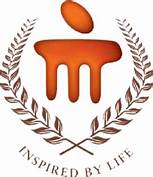

Mask to extract Manipal Logo


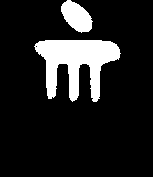

Extracted Manipal Logo


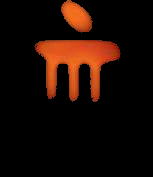

In [24]:
img = cv2.imread("/content/MAHE.jpg")
print("Manipal Logo")
#cv2_imshow(img)
    
# Convert image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Threshold of blue in HSV space
lower_bound = np.array([1, 180, 100])
#lower_blue = np.array([125, 0, 0])
upper_bound = np.array([150, 255, 255])
#upper_blue = np.array([255, 0, 0])

 
# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_bound, upper_bound)

     
# Multiply the mask with the original image to extract the logo
result = cv2.bitwise_and(img, img, mask = mask)
print("Manipal Logo with Text")
cv2_imshow(img)
print("Mask to extract Manipal Logo")
cv2_imshow(mask)
print("Extracted Manipal Logo")
cv2_imshow(result)


Manipal Logo
Manipal Logo with Text


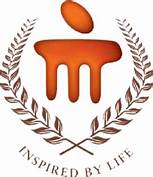

Mask to extract Manipal Logo


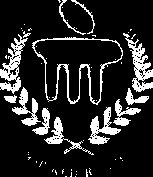

Extracted Manipal Logo


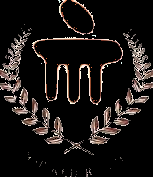

In [68]:
img = cv2.imread("/content/MAHE.jpg")
print("Manipal Logo")
#cv2_imshow(img)
    
# Convert image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Threshold of blue in HSV space
lower_bound = np.array([0, 20, 70])
#lower_blue = np.array([125, 0, 0])
upper_bound = np.array([120,190, 255])
#upper_blue = np.array([255, 0, 0])

 
# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_bound, upper_bound)

     
# Multiply the mask with the original image to extract the logo
result = cv2.bitwise_and(img, img, mask = mask)
print("Manipal Logo with Text")
cv2_imshow(img)
print("Mask to extract Manipal Logo")
cv2_imshow(mask)
print("Extracted Manipal Logo")
cv2_imshow(result)

Manipal Logo
Manipal Logo with Text


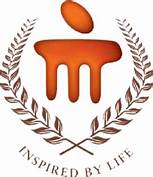

Mask to extract Manipal Logo


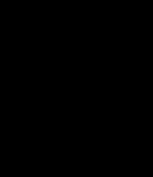

Extracted Manipal Logo


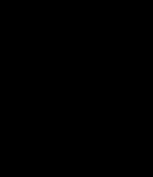

Extracted Text in Red


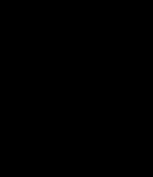

Inverted Mask


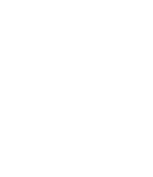

In [72]:
#Read png file
img = cv2.imread("/content/MAHE.jpg")
print("Manipal Logo")
#cv2_imshow(img)


    
# Convert image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
     
# Lower threshold to extract manipal logo
lower_bound = np.array([0, 0, 0])

# Upper threshold to extract manipal logo
upper_bound = np.array([50, 50, 50])

 
# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_bound, upper_bound)

     
# Multiply the mask with the original image to extract the logo
result = cv2.bitwise_and(img, img, mask = mask)
print("Manipal Logo with Text")
cv2_imshow(img)
print("Mask to extract Manipal Logo")
cv2_imshow(mask)
print("Extracted Manipal Logo")
cv2_imshow(result)

#Use mask on a red colored image to properly see the extracted image
text = cv2.bitwise_and(red_image,red_image, mask = mask)
print("Extracted Text in Red")
cv2_imshow(text)

#Inverting the mask to extract text
print("Inverted Mask")
cv2_imshow(255-mask)

# **CANNY EDGE DETECTION**

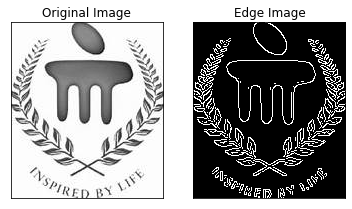

In [73]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('MAHE.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# **Shape Detection USING CONTOURS**



In [ ]:
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow

In [ ]:
#Read the test image:
image = cv2.imread('/content/shape-4-1.png', 0)
print('Shape:', image.shape)
print('Data type:', image.dtype)
print('RGB Color Space')
cv2_imshow(image)

In [ ]:
image = cv2.imread('/content/MicrosoftTeams-image.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

edged = cv2.Canny(gray, 30, 200) 

contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Canny Edges After Contouring")
cv2_imshow(edged)
cv2.imwrite('CannyFish.jpg', edged)  

print("Number of Contours: " + str(len(contours))) 

In [ ]:
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

print("Contours")
cv2_imshow(image)
cv2.imwrite('/content/MicrosoftTeams-image.png', image)

In [ ]:
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(image, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText( image, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(image, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        else:
            cv2.putText(image, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        cv2.putText(image, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        cv2.putText(image, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(image, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

In [ ]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()